In [56]:
import re
import os
import matplotlib.pyplot as plt
import ast
import numpy as np

In [57]:
def define_filepath(domain, granularity, model_type, integration_type):
    filepath = f"../results/scglue/point_nine_corr/{model_type}/{integration_type}/scib_metrics/scib_metrics-{domain}-{granularity}.txt"
    return filepath

In [58]:
def generate_across_params_dict():
    across_params_dict = {}
    return across_params_dict

In [59]:
def read_scib(filepath):
    # Open the file for reading
    with open(filepath, 'r') as file:
        # Initialize empty dictionaries
        batch_effect_metrics = {}
        label_conservation_metrics = {}

        # Initialize a variable to keep track of the current dictionary being populated
        current_dict = None

        # Loop through each line in the file
        for line in file:
            # Remove leading and trailing whitespace
            if not line.strip():
                continue
                
            line = line.strip()

            # Check if the line contains a dictionary name
            if line.endswith(':'):
                # Extract the dictionary name
                dict_name = line[:-1]

                # Check which dictionary we are populating
                if dict_name == 'batch_effect_metrics':
                    current_dict = batch_effect_metrics
                elif dict_name == 'label conservation metrics':
                    current_dict = label_conservation_metrics
                else:
                    current_dict = None

            # Check if the line contains a key-value pair
            elif current_dict is not None:
                # Extract the key and value
                key_value = line.split(":", 1)
                #print(key_value)
                
                if key_value[0] == 'nmi_ari_leiden':
                    tmp_dict = ast.literal_eval(key_value[1].strip())
                    current_dict['nmi'] = tmp_dict['nmi']
                    current_dict['ari'] = tmp_dict['ari']                
                else:
                    current_dict[key_value[0]] = float(key_value[1].strip())
    
    return batch_effect_metrics, label_conservation_metrics

In [60]:
def update_across_params_dict(across_params_dict, batch_effect_metrics, label_conservation_metrics,
                              domain, granularity, model_type, integration_type):
    key = f"{domain}-{granularity}-{model_type}-{integration_type}"
    value = (batch_effect_metrics, label_conservation_metrics)
    across_params_dict[key] = value

In [61]:
def within_params_barplots(across_params_dict, domains, granularities, model_types, integration_types):
    for model_type in model_types:
        for integration_type in integration_types:
            fig, axs = plt.subplots(2, 4, figsize=(20,10))
            tmp=0
            for j, domain in enumerate(domains):
                if tmp == 1:
                    j +=1
                for i, granularity in enumerate(granularities):
                    tmp = i
                    for k, metric_type in enumerate(['batch_int_metrics','label_cons_metrics']):
                        key_name = f"{domain}-{granularity}-{model_type}-{integration_type}"

                        batch_metrics_dict = across_params_dict[key_name][k]
                        labels = list(batch_metrics_dict.keys())
                        values = list(batch_metrics_dict.values())
                        
                        #loop debugging code
                        """print(f"{key_name}-{metric_type}")
                        print(f"j {j}")
                        print(f"i {i}")
                        print(f"k {k}")
                        print(f"i+j {i+j}")
                        print("\n\n")"""
                                                
                        axs[k, i+j].set_title(f"{key_name}", fontsize=11, pad=17)
                        bars = axs[k, i+j].bar(labels, values)
                        axs[k, i+j].set_xticklabels(labels, rotation=70)

                        for bar in bars:
                            height = bar.get_height()
                            axs[k, i+j].text(bar.get_x() + bar.get_width()/2.,
                                             height+0.05, '%.2f' % height, ha='center', va='bottom', fontsize=11)
                    
                    #print(values)
                    
            plt.subplots_adjust(hspace = 0.65, wspace=0.4, top=0.88)
            plt.suptitle(f"{model_type}-{integration_type}", fontsize=16)
            plt.show()
            plt.close()

In [62]:
def across_params_barplots(across_params_dict, domains, granularities, model_types, integration_types):
    #need to extract multiple coefs metrics simultaneously if u want to compare them
    for i, domain in enumerate(domains):
        for j, granularity in enumerate(granularities):
            for k, model_type in enumerate(model_types):
                fig, axs = plt.subplots(2, 3, figsize=(20,10))
                for m, integration_type in enumerate(integration_types):
                    for l, metric_type in enumerate(['batch_int_metrics','label_cons_metrics']):
                        #print(integration_type)
                        key_name = f"{domain}-{granularity}-{model_type}-{integration_type}"
                        #print(key_name)

                        batch_metrics_dict = across_params_dict[key_name][l]
                        labels = list(batch_metrics_dict.keys())
                        values = list(batch_metrics_dict.values())

                        axs[l, m].set_title(f"{integration_type} - {metric_type}", fontsize=14, pad=16)
                        bars = axs[l, m].bar(labels, values)
                        axs[l, m].set_xticklabels(labels, rotation=70)

                        for bar in bars:
                            height = bar.get_height()
                            axs[l, m].text(bar.get_x() + bar.get_width()/2., height + 0.05, 
                                           '%.2f' % height, ha='center', va='bottom', fontsize=11)

                        #print(values)
                    
                plt.subplots_adjust(hspace = 0.65, wspace=0.4, top=0.88)
                plt.suptitle(f"{domain}-{granularity}-{model_type}", fontsize=16)
                plt.show()
                plt.close()

In [63]:
def main(domains = ['Domain', 'Domain_major'], 
         granularities = ['Annotation_cell_type', 'Annotation_major_subset'],
         model_types = ['paired', 'unpaired'],
         integration_types = ['cite', 'full', 'trimodal']):
    across_params_dict = generate_across_params_dict()
    for domain in domains:
        for granularity in granularities:
            for model_type in model_types:
                for integration_type in integration_types:
                    #print(domain, granularity, model_type, integration_type)
                    filepath = define_filepath(domain, granularity, model_type, integration_type)
                    #print(filepath)
                    batch_effect_metrics, label_conservation_metrics = read_scib(filepath)
                    update_across_params_dict(across_params_dict, batch_effect_metrics, label_conservation_metrics,
                                              domain, granularity, model_type, integration_type)
    
    #within_params_barplots(across_params_dict, domains, granularities, model_types, integration_types)
    across_params_barplots(across_params_dict, domains, granularities, model_types, integration_types)

/tmp/ipykernel_1799701/1592775541.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[l, m].set_xticklabels(labels, rotation=70)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


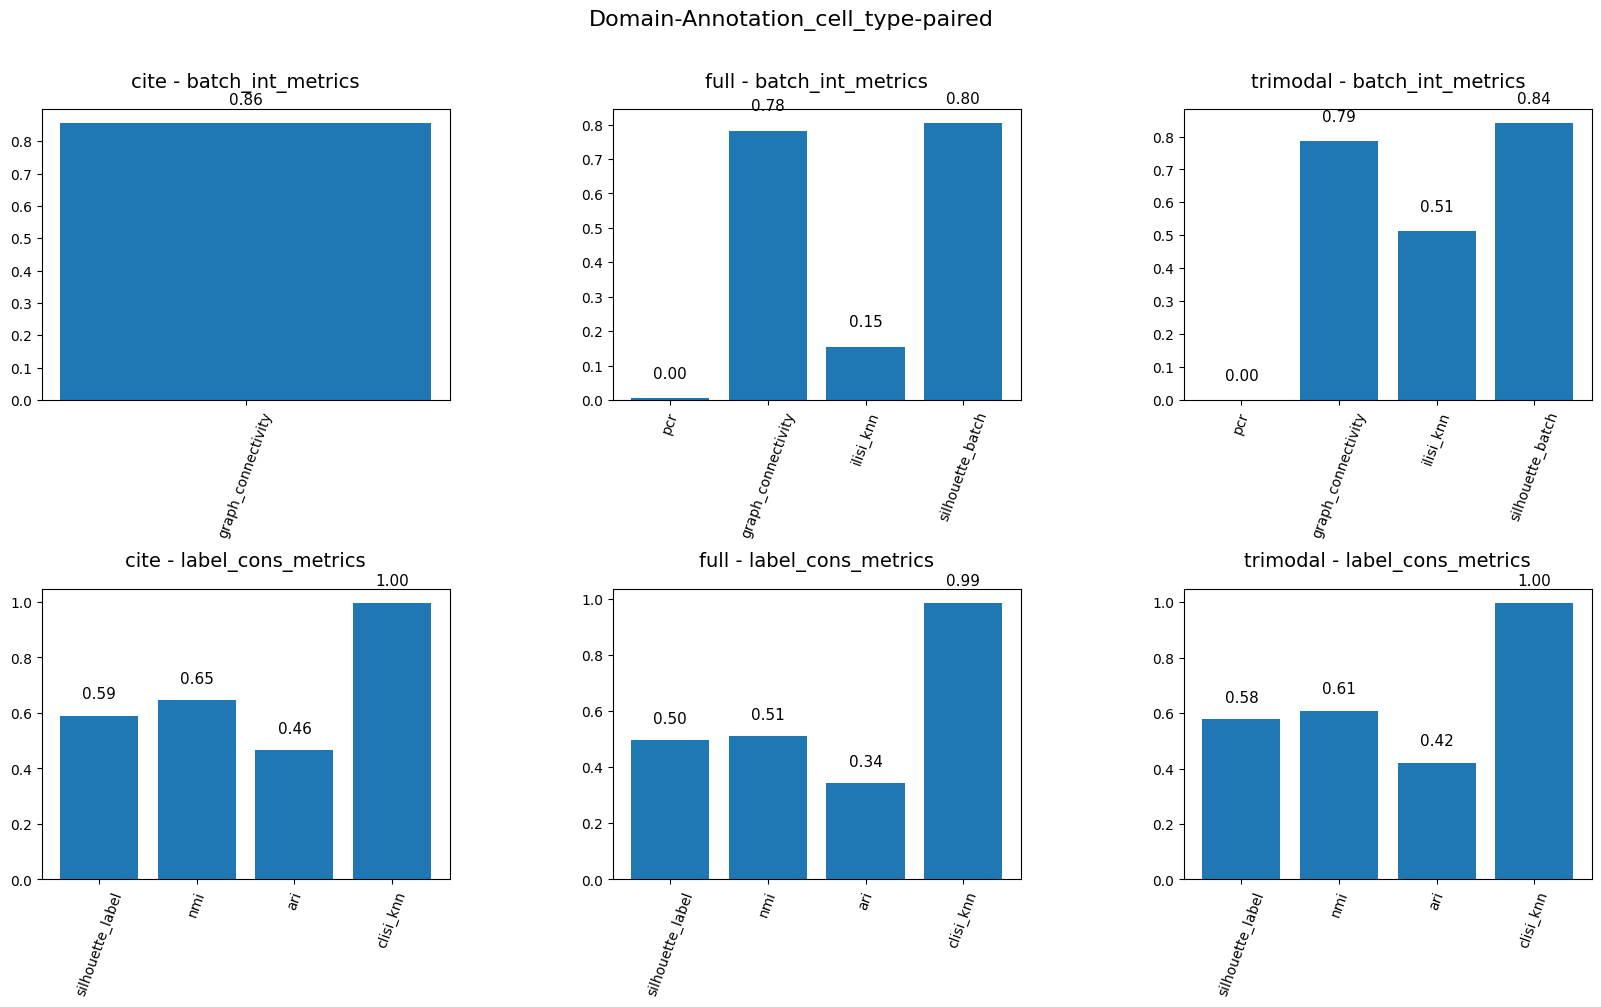

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


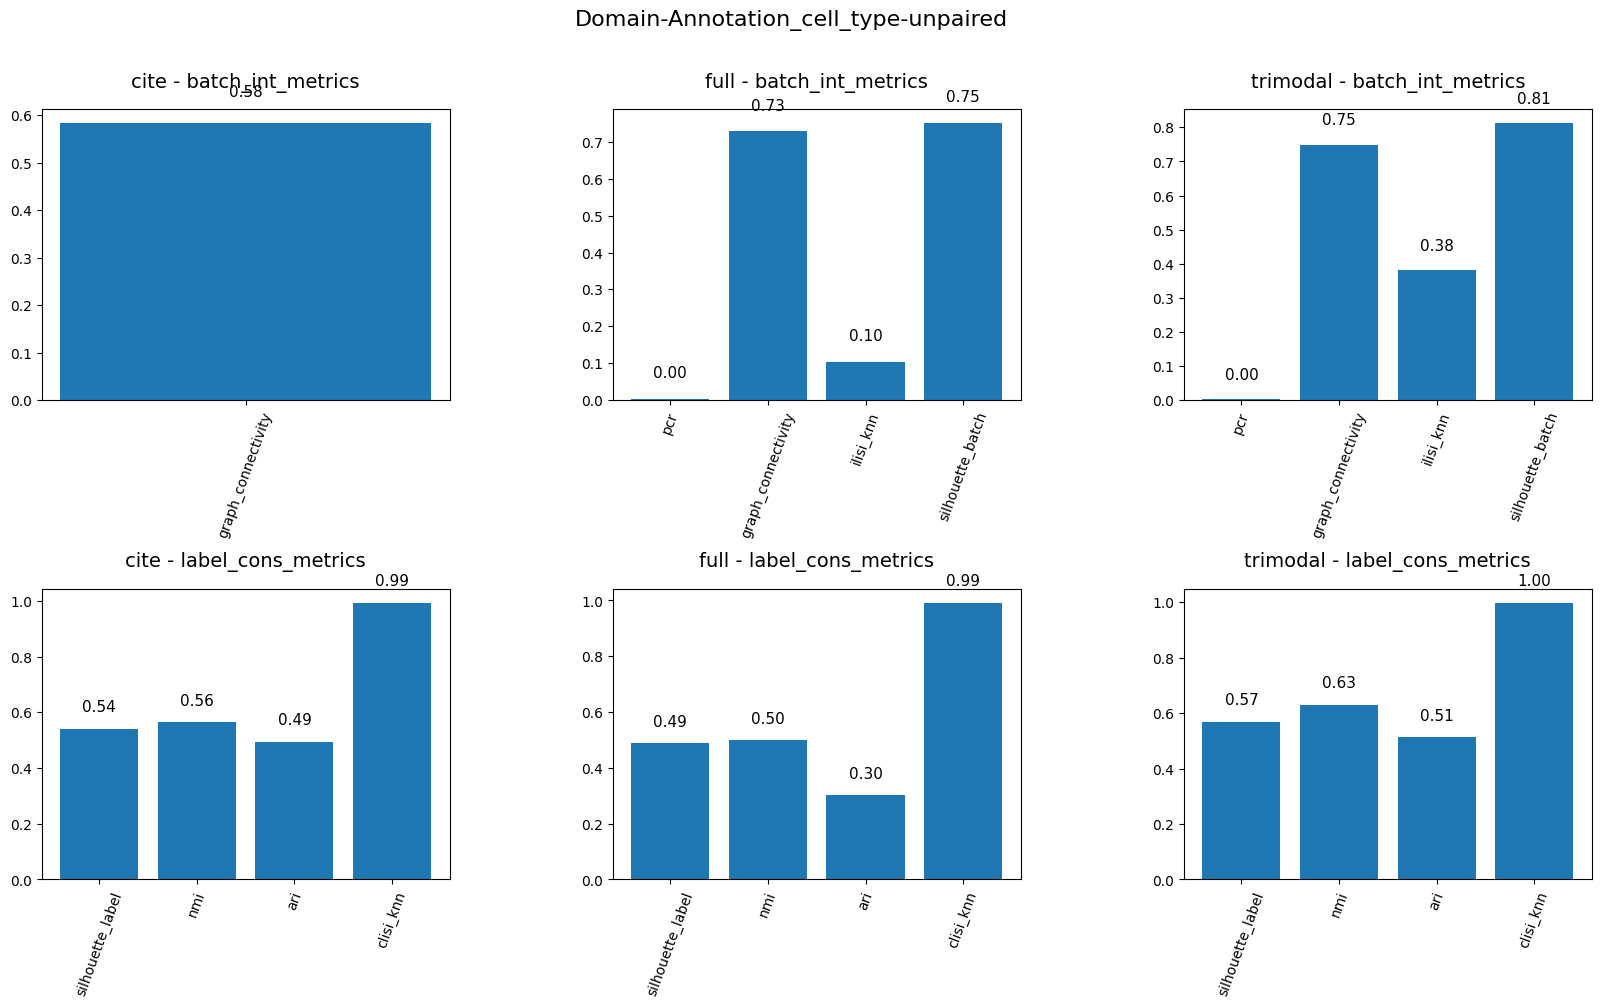

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


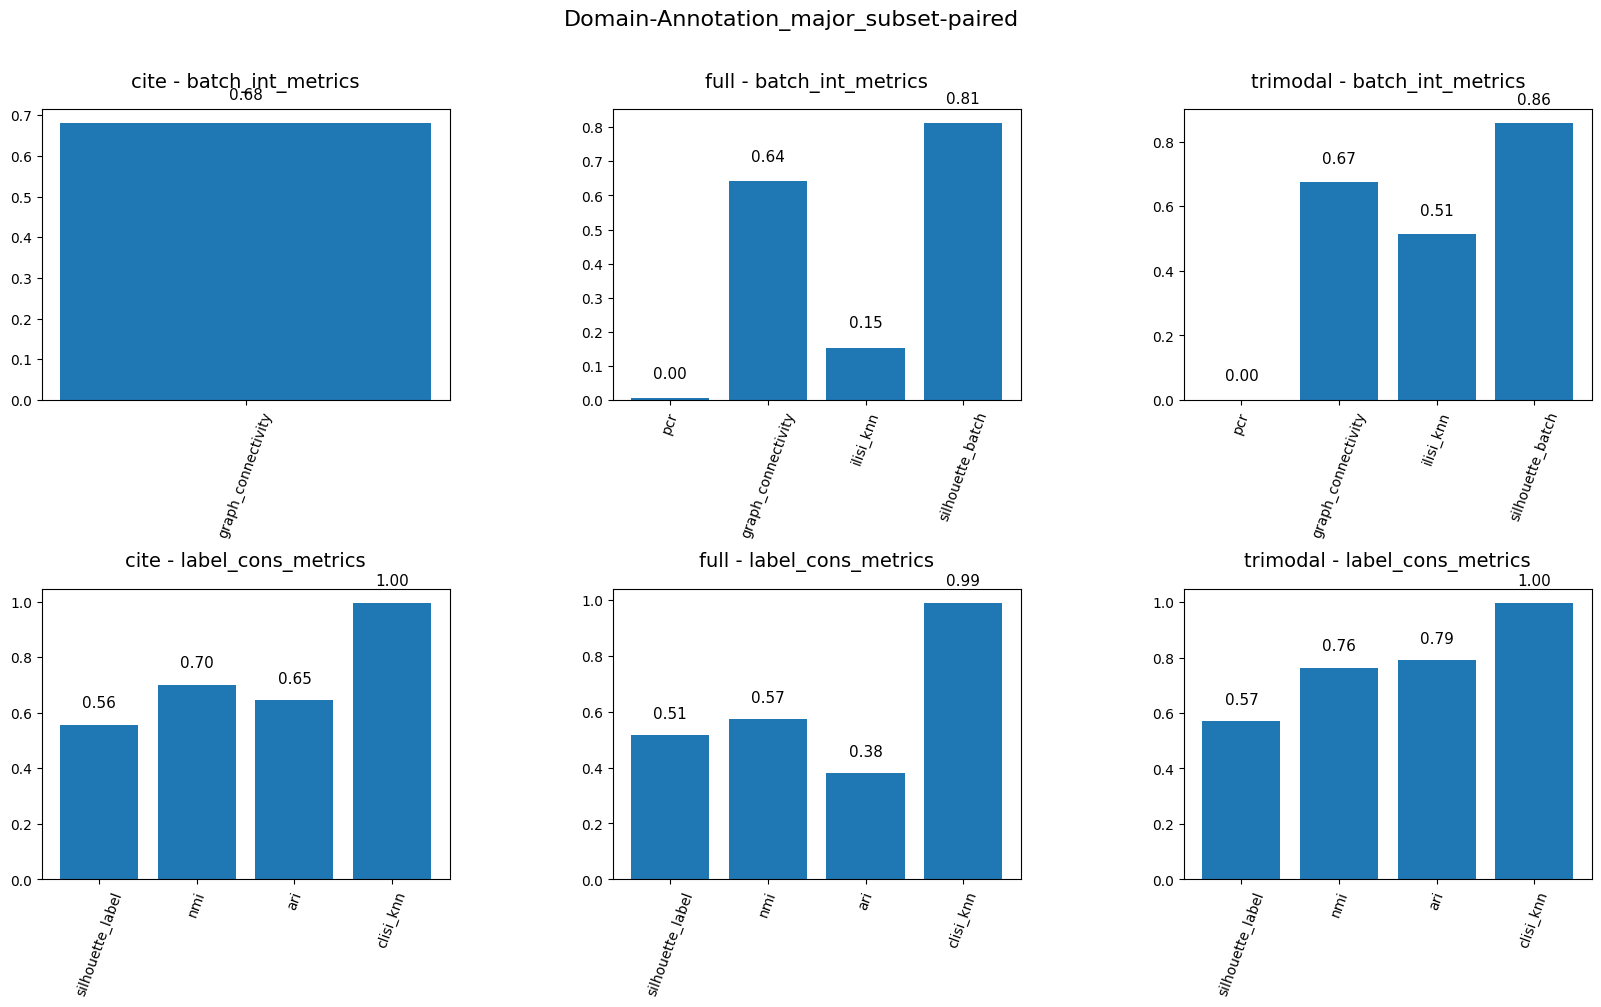

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


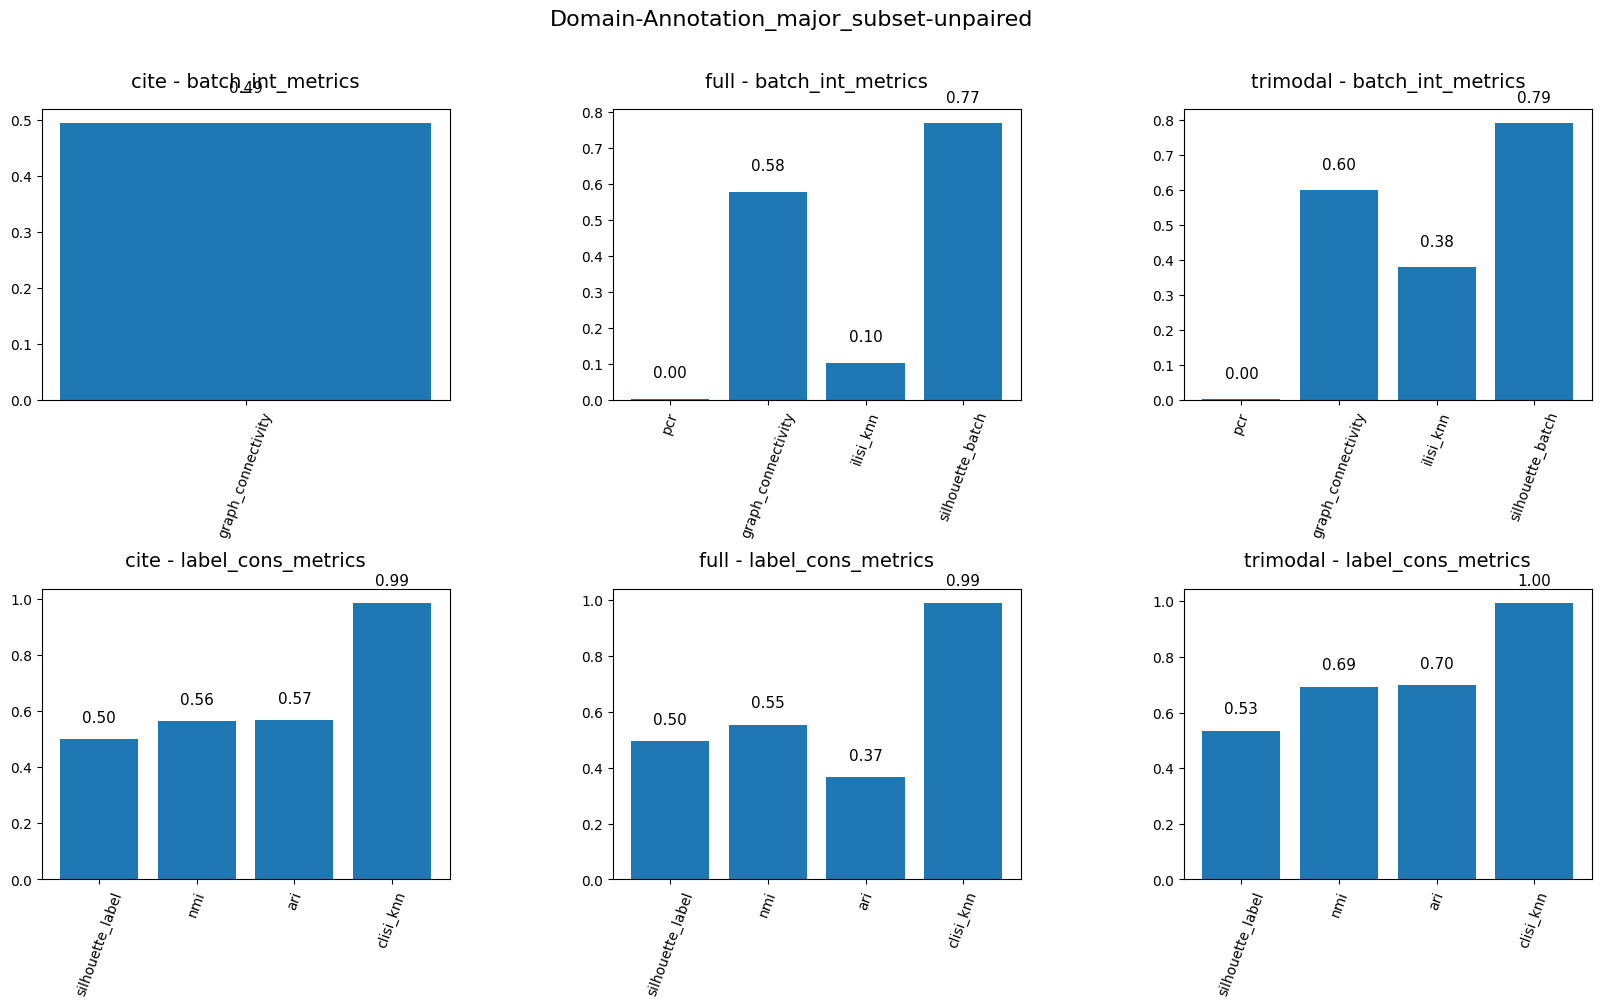

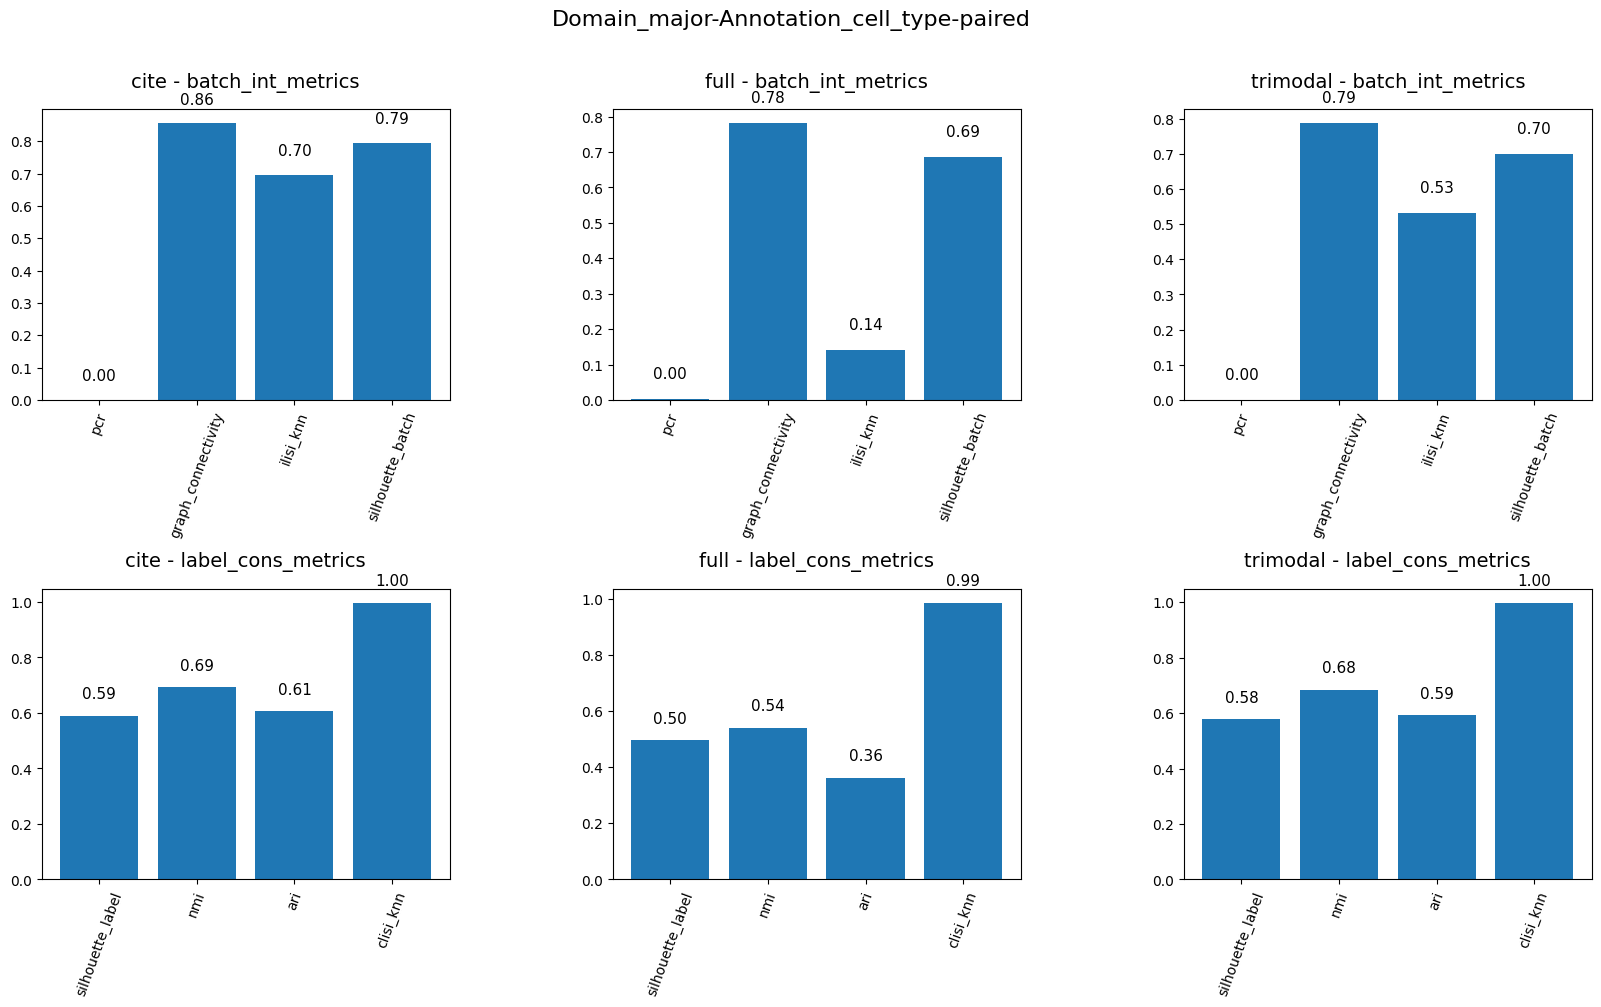

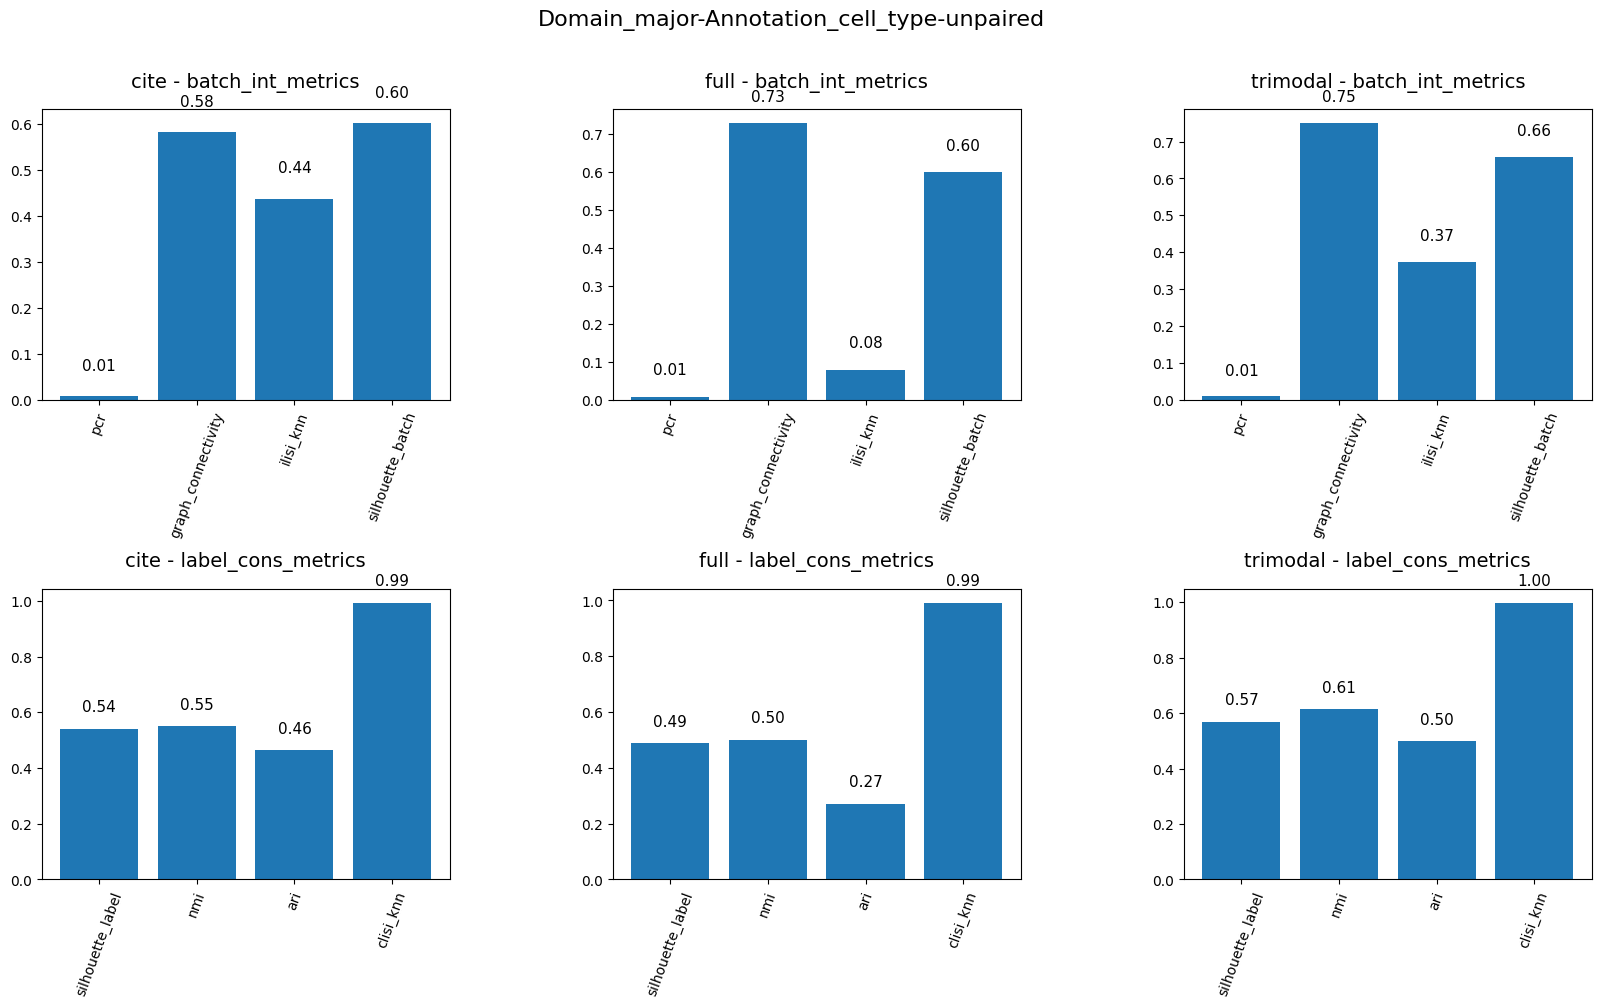

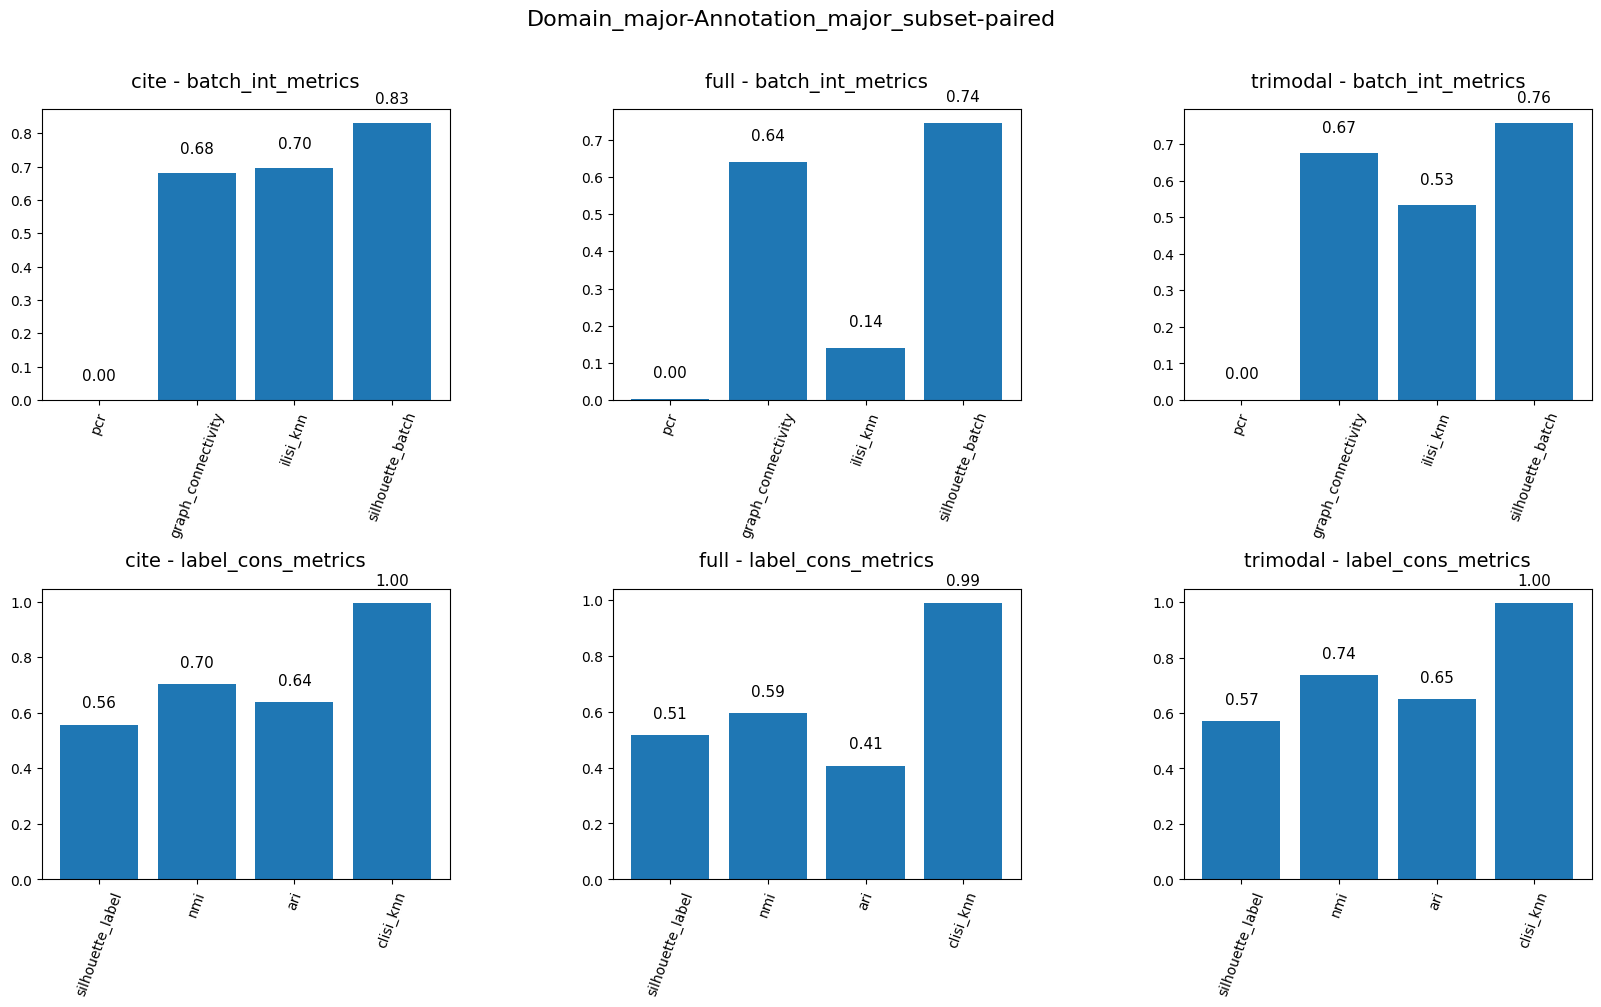

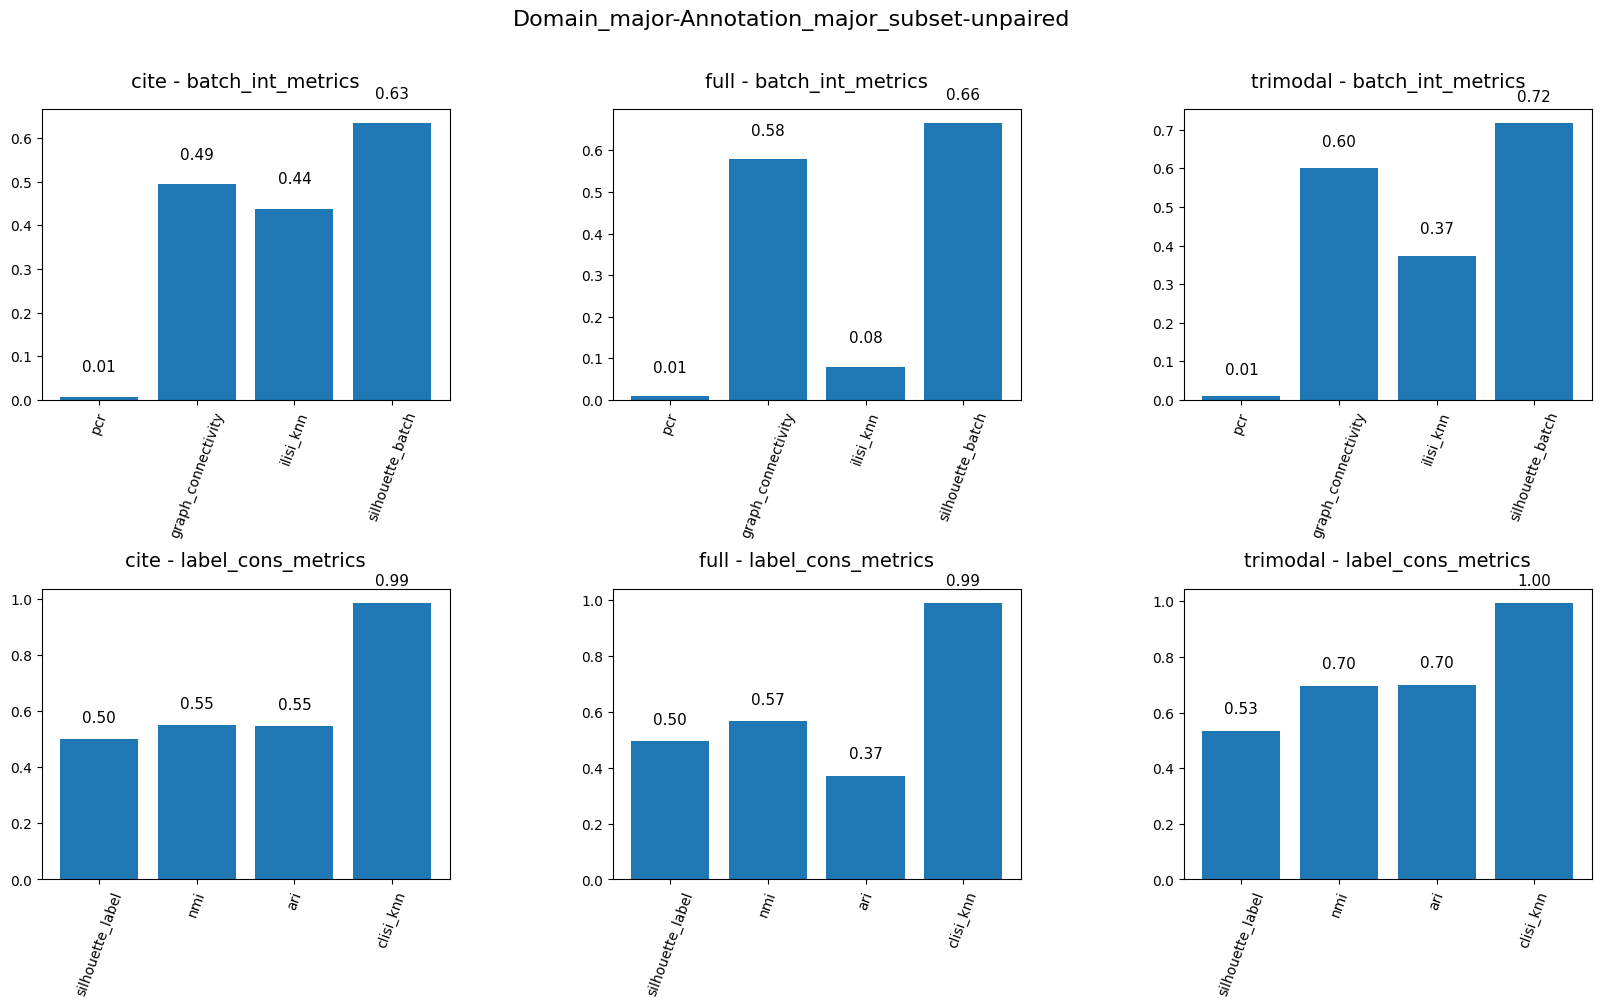

In [64]:
main()